# Importing the Libraries

In [2]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
from sklearn.metrics import mean_squared_error
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
from datetime import datetime
from scipy.stats import entropy

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
import math 
from reliability.Fitters import Fit_Weibull_2P

from reliability.Probability_plotting import plot_points

from reliability.Distributions import Weibull_Distribution

import pywt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False
from scipy.stats import entropy

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [3]:
import folium
from folium.plugins import MarkerCluster


In [4]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import mysql.connector

In [5]:
df=pd.read_csv('ClimateData.csv').drop(columns=['Unnamed: 0'])

# L.A. Rare Events

In [6]:
la=df[(df['City']=='Los Angeles')]

In [7]:
la.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
41361,1951-01-01,8.987,0.378,Los Angeles,United States,34.053691,-118.242767,1951,1
41362,1951-02-01,9.758,0.296,Los Angeles,United States,34.053691,-118.242767,1951,2
41363,1951-03-01,11.947,0.290,Los Angeles,United States,34.053691,-118.242767,1951,3
41364,1951-04-01,14.022,0.370,Los Angeles,United States,34.053691,-118.242767,1951,4
41365,1951-05-01,16.977,0.339,Los Angeles,United States,34.053691,-118.242767,1951,5


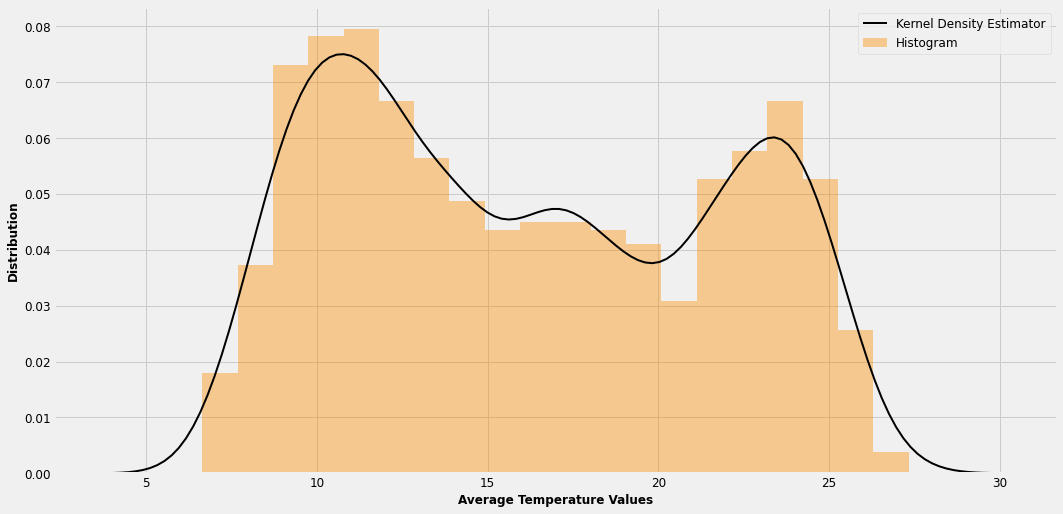

In [110]:
sns.kdeplot(la.AverageTemperature,bw=1.0,label='Kernel Density Estimator',color='k')
sns.distplot(la.AverageTemperature,kde=False,norm_hist=True, label='Histogram',color='darkorange',bins=20)
plt.grid(True)
plt.xlabel('Average Temperature Values')
plt.ylabel('Distribution')
plt.legend()

In [111]:
from sklearn.neighbors import KernelDensity

In [113]:
X=np.array(la.AverageTemperature)
X=X.reshape(-1,1)

In [114]:
kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(X)

In [115]:
MAX_EXTR=[]
for i in range(5000):
    MAX_EXTR.append(kde.sample(12).max())

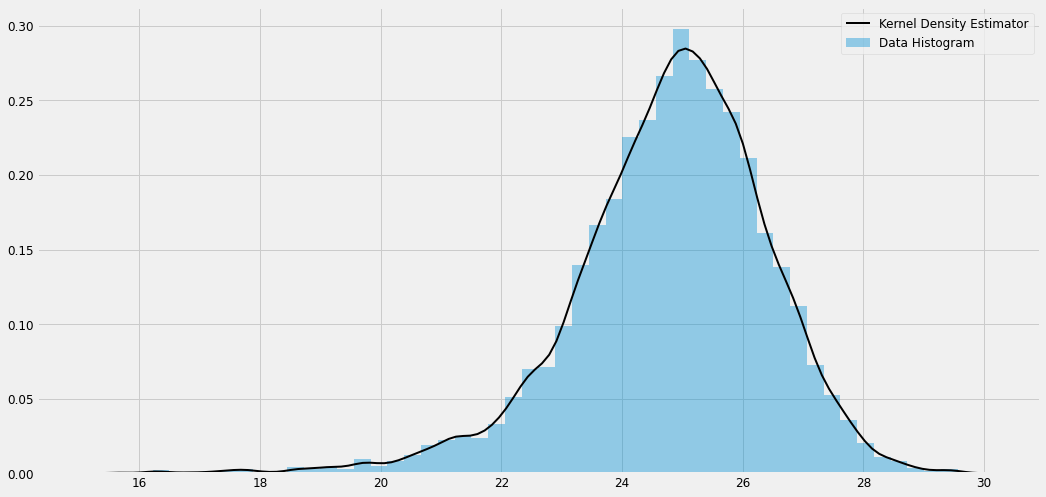

In [117]:
my_kde = sns.kdeplot(MAX_EXTR,bw=0.2,label='Kernel Density Estimator',color='k')
line = my_kde.lines[0]
x, y = line.get_data()
sns.distplot(MAX_EXTR,norm_hist=True,kde=False,label='Data Histogram')
#plt.plot(sns.distplot(kde.sample(1000)))
plt.grid(True)
plt.legend()

In [118]:
from scipy import stats

In [123]:
kernel = stats.gaussian_kde(MAX_EXTR,bw_method=0.2)
source_dis=kernel.pdf(np.linspace(min(MAX_EXTR),max(MAX_EXTR),5000))

Results from Fit_Weibull_2P (95% CI):
           Point Estimate  Standard Error   Lower CI   Upper CI
Parameter                                                      
Alpha           25.518473        0.021260  25.476837  25.560176
Beta            17.915774        0.189064  17.549022  18.290191
Log-Likelihood: -9353.804203846033 



Text(0, 0.5, 'Fraction of values')

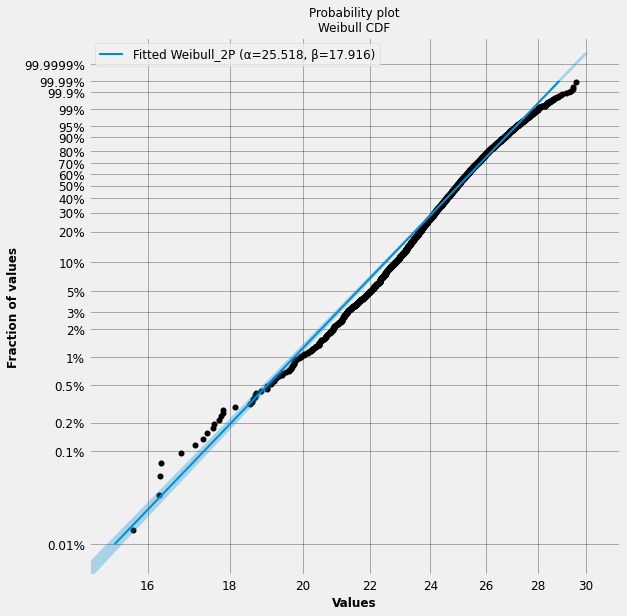

In [125]:
wb = Fit_Weibull_2P(failures=MAX_EXTR)
plt.xlabel('Values',fontsize=12)
plt.ylabel('Fraction of values',fontsize=12)

In [126]:
comp_dist=wb.distribution.PDF(np.linspace(min(MAX_EXTR),max(MAX_EXTR),len(MAX_EXTR)),show_plot=False)

In [127]:
test=entropy(source_dis,comp_dist)+entropy(source_dis,comp_dist)

In [128]:
if wb.success==True:
    print('The Weibull test is a success')
if wb.success==False:
    print('The Weibull test is a failure')

The Weibull test is a success


In [129]:
test=entropy(source_dis,comp_dist)+entropy(source_dis,comp_dist)
test=test/2

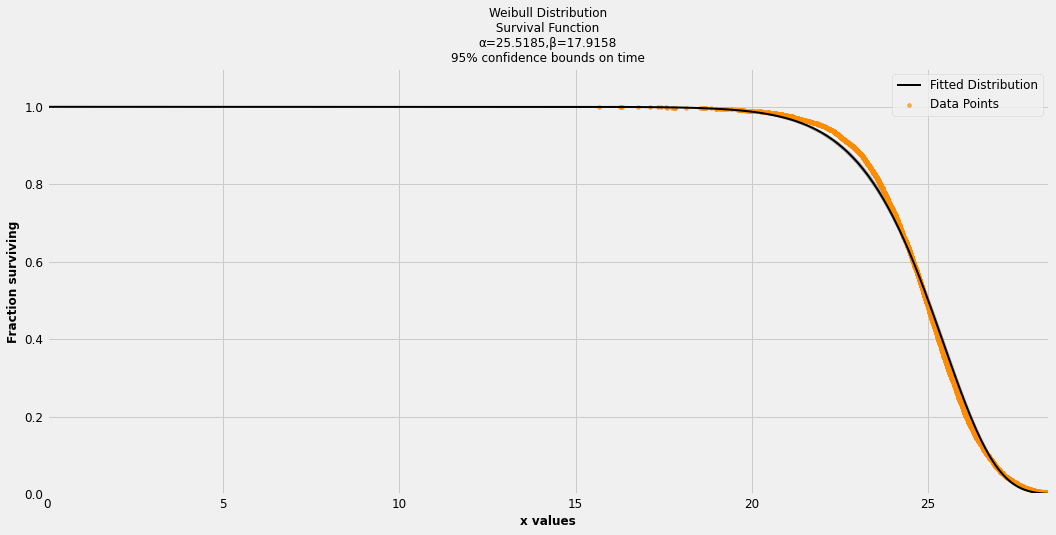

In [130]:

weibull_fit = Fit_Weibull_2P(failures=MAX_EXTR,show_probability_plot=False,print_results=False)
weibull_fit.distribution.SF(label='Fitted Distribution',color='k')
plot_points(failures=MAX_EXTR,func='SF',label='Data Points',color='darkorange',alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()

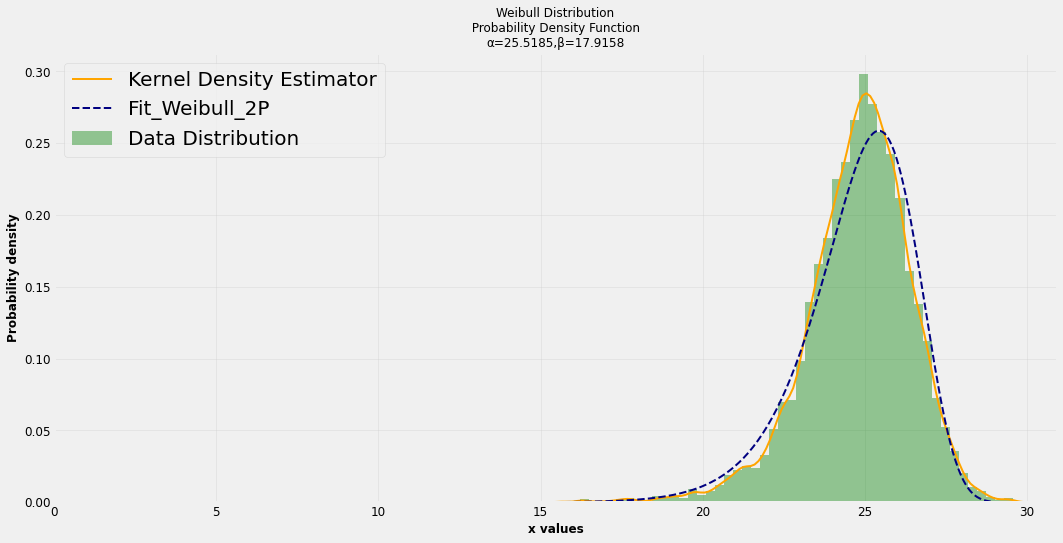

In [131]:
sns.kdeplot(MAX_EXTR,bw=0.2,label='Kernel Density Estimator',color='orange')
sns.distplot(MAX_EXTR,norm_hist=True,kde=False,label='Data Distribution',color='green')
#plt.plot(sns.distplot(kde.sample(1000)))
plt.grid(True,alpha=0.3)
wb_dist=wb.distribution.PDF(label='Fit_Weibull_2P', linestyle='--',show_plot=True,color='navy' )
plt.legend(fontsize=20)

In [132]:
wb.results

,Point Estimate,Standard Error,Lower CI,Upper CI
Parameter,,,,
Alpha,25.518473,0.021260,25.476837,25.560176
Beta,17.915774,0.189064,17.549022,18.290191


In [145]:
E=[]
dist=Weibull_Distribution(wb.alpha,wb.beta)
for i in range(500):
    sample=dist.random_samples(5000)
    kernel = stats.gaussian_kde(sample,bw_method=0.2)
    hyp_dis=kernel.pdf(np.linspace(min(MAX_EXTR),max(MAX_EXTR),5000))
    E.append((entropy(source_dis,hyp_dis)+entropy(hyp_dis,source_dis))/2.)
    #print(i+1,100)

In [1166]:
#kernel = stats.gaussian_kde(E,bw_method=0.5)
#final_dist=kernel.pdf(np.linspace(min(E),max(E),len(E)))

In [146]:
test

0.016613489407076402

In [147]:
res = stats.cumfreq(E, numbins=len(E))
a=res.lowerlimit
b=a+len(E)*res.binsize
step=res.binsize
res=res.cumcount/len(E)
th_value=E_th()

In [148]:
a=res.lowerlimit
b=a+len(E)*res.binsize
step=res.binsize

In [149]:
res=res.cumcount/len(E)

In [150]:
def alpha(array_like):
    array_like=array_like-0.95
    array_like=np.abs(array_like)
    return np.argwhere(array_like==array_like.min())
    

In [151]:
def E_th():
    e=np.arange(a,b-step,step)
    return e[alpha(res)].mean()

In [152]:
th_value=E_th()

In [262]:
def comp(t):
    LIST=np.arange(a,b-step,step)
    new=np.abs(LIST-t)
    return res[new.argmin()]

In [263]:
comp(test)

0.934

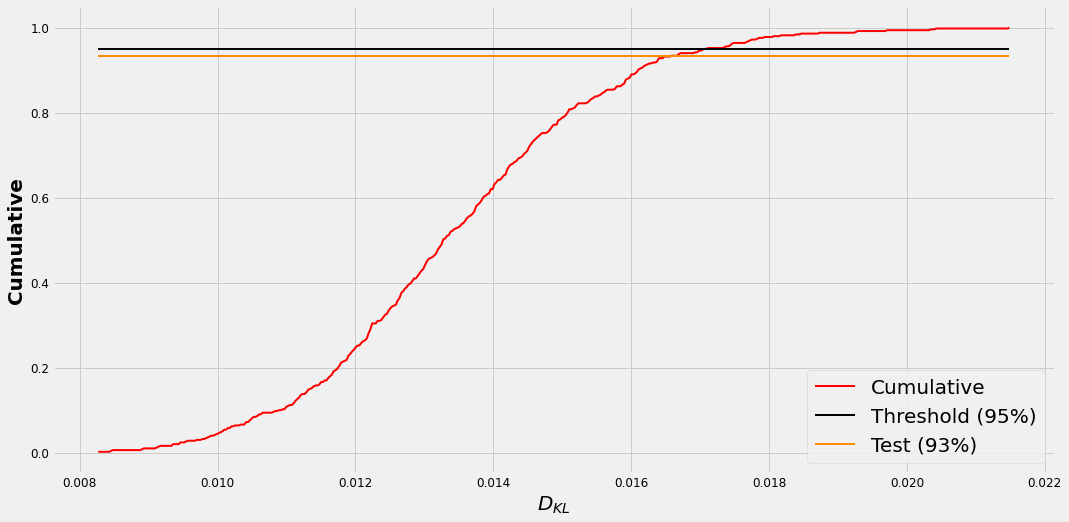

In [155]:
plt.plot(np.arange(a,b,step),res,color='red',label='Cumulative')
plt.grid(True)
plt.plot(np.arange(a,b,step),np.zeros(len(E))+0.95,color='k',label='Threshold (95%)')
plt.plot(np.arange(a,b,step),np.zeros(len(E))+comp(test),color='darkorange',label="Test ({:.0%})".format(comp(test)))
plt.xlabel('$D_{KL}$',fontsize=20)
plt.ylabel('Cumulative',fontsize=20)
plt.legend(fontsize=20)

# Rare Events + Stationarity

In [160]:
DEC=np.arange(df.year.min(),df.year.max(),10)

In [162]:
Fit_Weibull_2P(failures=MAX_EXTR,show_probability_plot=False,print_results=False)

In [225]:
WB=[]
VAL=[]
for d in range(len(DEC)-1):
    data=la[(la.year>=DEC[d]) & (la.year<DEC[d+1])]
    X=np.array(data.AverageTemperature)
    X=X.reshape(-1,1)
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
    MAX_EXTR=[]
    for i in range(5000):
        MAX_EXTR.append(kde.sample(12).max())
    wb = Fit_Weibull_2P(failures=MAX_EXTR,show_probability_plot=False,print_results=False)
    VAL.append(np.linspace(min(MAX_EXTR),max(MAX_EXTR),len(MAX_EXTR)))
    comp_dist=wb.distribution.PDF(np.linspace(min(MAX_EXTR),max(MAX_EXTR),len(MAX_EXTR)),show_plot=False)
    WB.append(comp_dist)

In [244]:
X_V=[]
Y_V=[]
for d in range(len(DEC)):
    x_v=np.zeros(len(VAL[0]))+la[la.year==DEC[d]+1].AverageTemperature.max()
    y_v=np.linspace(0,0.40,len(x_v))
    X_V.append(x_v)
    Y_V.append(y_v)

In [248]:
import matplotlib.colors

In [255]:
Colors=['red','purple','yellow','darkorange','k','green','navy']

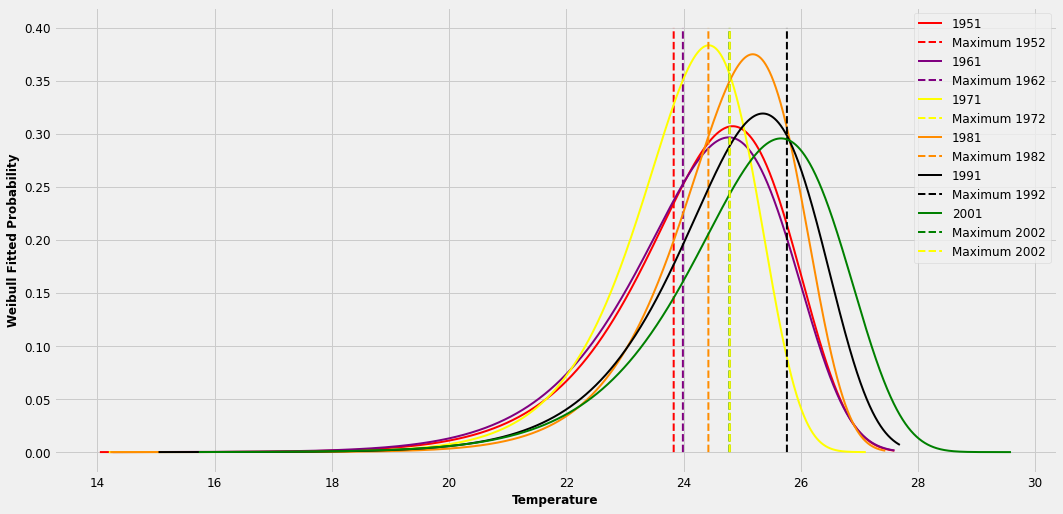

In [261]:
for i in range(len(WB)):
    plt.plot(VAL[i],WB[i],label='%s'%(DEC[i]),color=Colors[i])
    plt.plot(X_V[i],Y_V[i],'--',label='Maximum %i'%(DEC[i]+1),color=Colors[i])
plt.grid(True)
plt.plot(X_V[2],Y_V[2],'--',label='Maximum %i'%(DEC[i]+1),color=Colors[2])

plt.ylabel('Weibull Fitted Probability')
plt.xlabel('Temperature')
plt.legend()


# All the Cities

In [ ]:
CITIES=df.City.drop_duplicates().tolist()

In [270]:
TEST_H=[]
COMP_TEST=[]
k=0
for c in CITIES:
    city=df[df['City']==c]
    X=np.array(city.AverageTemperature)
    X=X.reshape(-1,1)
    kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(X)
    MAX_EXTR=[]
    for i in range(5000):
        MAX_EXTR.append(kde.sample(12).max())
    kernel = stats.gaussian_kde(MAX_EXTR,bw_method=0.2)
    source_dis=kernel.pdf(np.linspace(min(MAX_EXTR),max(MAX_EXTR),5000))
    wb = Fit_Weibull_2P(failures=MAX_EXTR,show_probability_plot=False, print_results=False)
    comp_dist=wb.distribution.PDF(np.linspace(min(MAX_EXTR),max(MAX_EXTR),len(MAX_EXTR)),show_plot=False)
    test=entropy(source_dis,comp_dist)+entropy(source_dis,comp_dist)
    test=test/2
    E=[]
    dist=Weibull_Distribution(wb.alpha,wb.beta)
    for i in range(100):
        sample=dist.random_samples(5000)
        kernel = stats.gaussian_kde(sample,bw_method=0.2)
        hyp_dis=kernel.pdf(np.linspace(min(MAX_EXTR),max(MAX_EXTR),5000))
        E.append((entropy(source_dis,hyp_dis)+entropy(hyp_dis,source_dis))/2.)
    k+=1
    try:
        res = stats.cumfreq(E, numbins=len(E))
        a=res.lowerlimit
        b=a+len(E)*res.binsize
        step=res.binsize
        res=res.cumcount/len(E)
        COMP_TEST.append(comp(test))
        if comp(test)<=0.95:
            TEST_H.append(1)
        else:
            TEST_H.append(0)
        
        print(str(c)+ ' has been tested ('+ str(k)+ ' out of 100)')
    except:
        TEST_H.append(0)
        print(str(c)+ ' has been tested  ('+ str(k)+ ' out of 100)\n')
        print('Error appeared')

Abidjan has been tested (1 out of 100)
Addis Abeba has been tested (2 out of 100)
Ahmadabad has been tested (3 out of 100)
Aleppo has been tested (4 out of 100)
Alexandria has been tested (5 out of 100)
Ankara has been tested (6 out of 100)
Baghdad has been tested (7 out of 100)
Bangalore has been tested (8 out of 100)
Bangkok has been tested (9 out of 100)
Belo Horizonte has been tested (10 out of 100)
Berlin has been tested (11 out of 100)
Bogotá has been tested (12 out of 100)
Bombay has been tested (13 out of 100)
Brasília has been tested (14 out of 100)
Cairo has been tested (15 out of 100)
Calcutta has been tested (16 out of 100)
Cali has been tested (17 out of 100)
Cape Town has been tested (18 out of 100)
Casablanca has been tested (19 out of 100)
Changchun has been tested (20 out of 100)
Chengdu has been tested (21 out of 100)
Chicago has been tested (22 out of 100)
Chongqing has been tested (23 out of 100)
Dakar has been tested (24 out of 100)
Dalian has been tested (25 out o

In [276]:
weibull_df=pd.DataFrame({'City':CITIES,'IsWeibull':TEST_H,'P-value':1-np.array(COMP_TEST)})

In [283]:
weibull_df=weibull_df.drop(weibull_df[weibull_df.City=='Los Angeles'].index)

In [285]:
weibull_df.head()

,City,IsWeibull,P-value
0,Abidjan,0,0.01
1,Addis Abeba,1,0.18
2,Ahmadabad,0,0.01
3,Aleppo,1,0.23
4,Alexandria,0,0.03


In [286]:
weibull_df.to_csv('weibullfitcity.csv')

In [298]:
iswei_city=weibull_df[weibull_df['IsWeibull']==1].City.tolist()

In [302]:
TOT_WB=[]
TOT_VAL=[]
k=0
for c in iswei_city:
    k+=1
    tot_data=df[df['City']==c]
    WB=[]
    VAL=[]
    try:
        for d in range(len(DEC)-1):
            data=tot_data[(tot_data.year>=DEC[d]) & (tot_data.year<DEC[d+1])]
            X=np.array(data.AverageTemperature)
            X=X.reshape(-1,1)
            kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
            MAX_EXTR=[]
            for i in range(5000):
                MAX_EXTR.append(kde.sample(12).max())
            wb = Fit_Weibull_2P(failures=MAX_EXTR,show_probability_plot=False,print_results=False)
            VAL.append(np.linspace(min(MAX_EXTR),max(MAX_EXTR),len(MAX_EXTR)))
            comp_dist=wb.distribution.PDF(np.linspace(min(MAX_EXTR),max(MAX_EXTR),len(MAX_EXTR)),show_plot=False)
            WB.append(comp_dist)
        TOT_WB.append(WB)
        TOT_VAL.append(VAL)
        print(str(c)+ ' has been tested ('+ str(k)+ ' out of '+ str(len(iswei_city))+')')
    except:
        print(str(c)+ ' has been tested ('+ str(k)+ ' out of '+ str(len(iswei_city))+'), but an error occured')

Addis Abeba has been tested (1 out of 81)
Aleppo has been tested (2 out of 81)
Ankara has been tested (3 out of 81)
Baghdad has been tested (4 out of 81)
Bangkok has been tested (5 out of 81)
Belo Horizonte has been tested (6 out of 81)
Berlin has been tested (7 out of 81)
Bombay has been tested (8 out of 81)
Brasília has been tested (9 out of 81)
Cairo has been tested (10 out of 81)
Calcutta has been tested (11 out of 81)
Cali has been tested (12 out of 81)
Cape Town has been tested (13 out of 81)
Casablanca has been tested (14 out of 81)
Changchun has been tested (15 out of 81)
Chengdu has been tested (16 out of 81)
Chicago has been tested (17 out of 81)
Chongqing has been tested (18 out of 81)
Dakar has been tested (19 out of 81)
Dalian has been tested (20 out of 81)
Dar Es Salaam has been tested (21 out of 81)
Delhi has been tested (22 out of 81)
Dhaka has been tested (23 out of 81)
Durban has been tested (24 out of 81)
Fortaleza has been tested (25 out of 81)
Gizeh has been tested

In [303]:
TOT_WB=np.array(TOT_WB)

In [309]:
import random


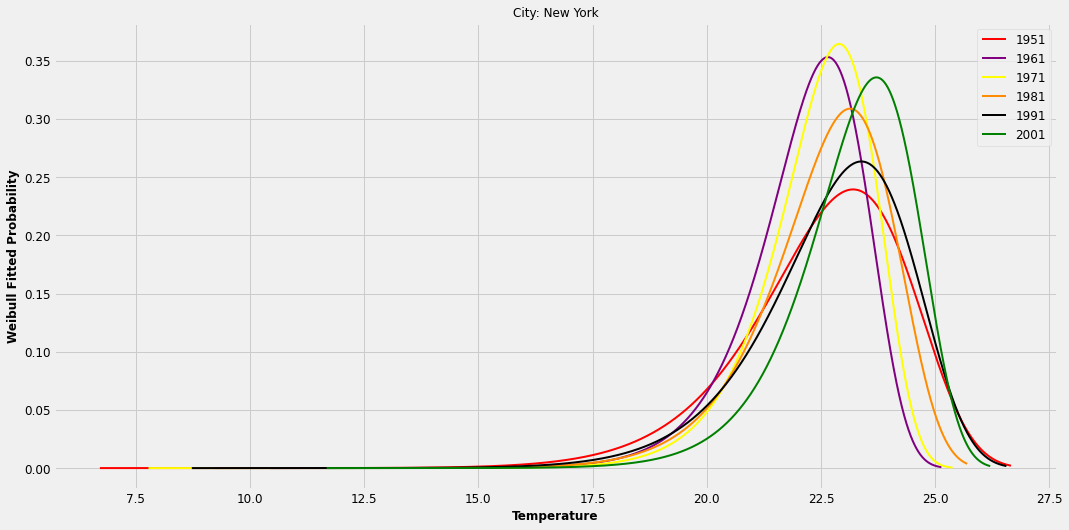

In [321]:
rand_city_i=random.choice(np.arange(0,len(iswei_city)))
rand_city=iswei_city[rand_city_i]
plt.title('City: '+str(rand_city))
for i in range(len(TOT_WB[rand_city_i])):
    plt.plot(TOT_VAL[rand_city_i][i],TOT_WB[rand_city_i][i],label='%s'%(DEC[i]),color=Colors[i])
    #plt.plot(X_V[i],Y_V[i],'--',label='Maximum %i'%(DEC[i]+1),color=Colors[i])
plt.grid(True)
#plt.plot(X_V[2],Y_V[2],'--',label='Maximum %i'%(DEC[i]+1),color=Colors[2])

plt.ylabel('Weibull Fitted Probability')
plt.xlabel('Temperature')
plt.legend()


In [542]:
TOT_MAX=[]
for i in range(len(TOT_WB)):
    CITY_MAX=[]
    for j in range(len(TOT_WB[i])):
        best=TOT_WB[i][j].argmax()
        CITY_MAX.append(TOT_VAL[i][j][best])
    TOT_MAX.append(CITY_MAX)

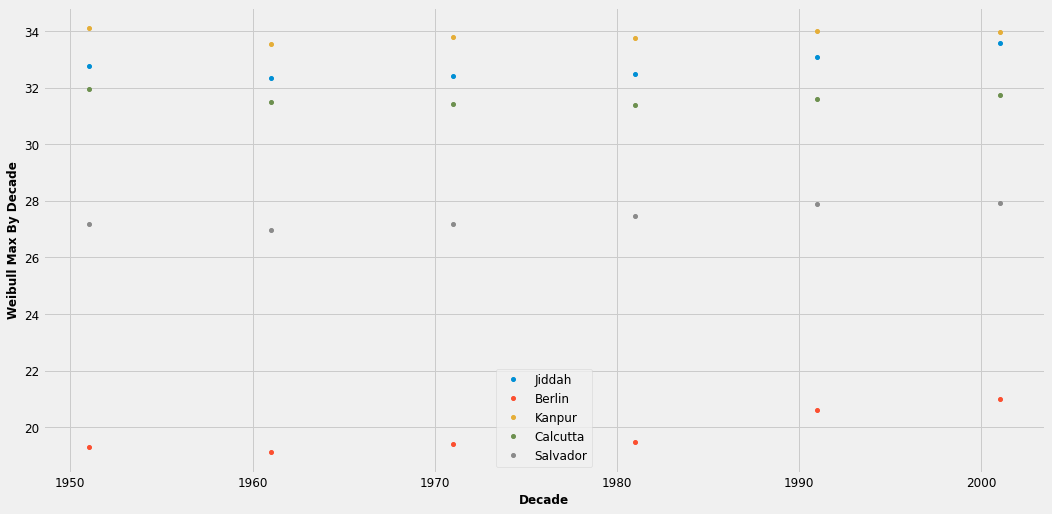

In [543]:
for k in range(5):
    rand_city_i=random.choice(np.arange(0,len(iswei_city)))
    rand_city=iswei_city[rand_city_i]
    plt.plot(DEC[:-1],TOT_MAX[rand_city_i],'.',label=str(rand_city))
    plt.ylabel('Weibull Max By Decade')
    plt.xlabel('Decade')
    plt.legend()
    plt.grid()

In [544]:
import numpy as np
from sklearn.linear_model import LinearRegression

Text(0.5, 1.0, 'City: Paris')

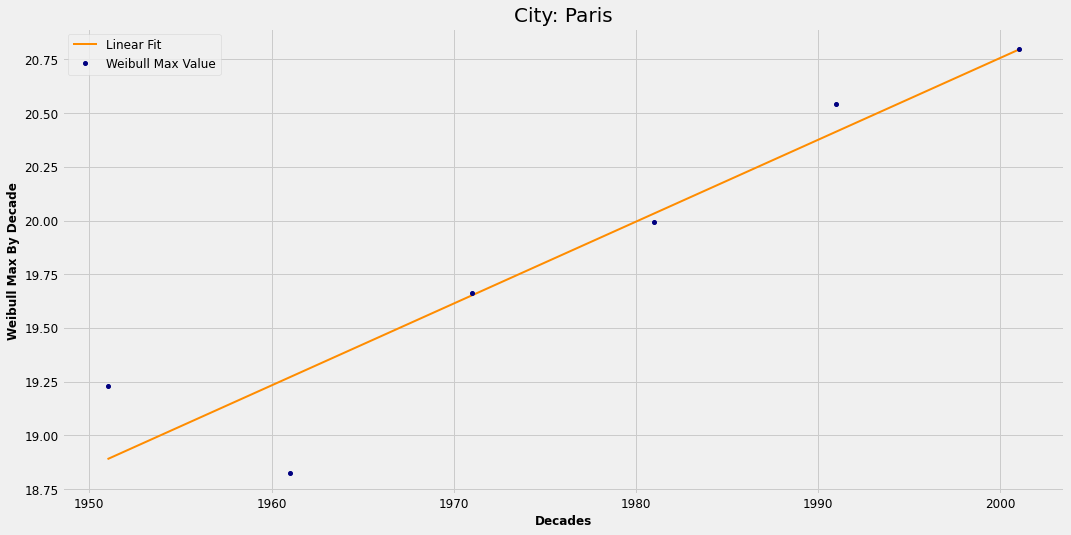

In [548]:
decades=np.array(DEC[:-1]).reshape(-1,1)
rand_city_i=random.choice(np.arange(0,len(iswei_city)))
rand_city=iswei_city[rand_city_i]
rand_val=np.array(TOT_MAX[rand_city_i]).reshape(-1,1)
fit=LinearRegression().fit(decades,rand_val)
plt.plot(decades,fit.predict(decades),color='darkorange',label='Linear Fit')
plt.plot(decades,rand_val,'.',color='navy',label='Weibull Max Value')
plt.xlabel('Decades')
plt.ylabel('Weibull Max By Decade')
plt.grid(True)
plt.legend()
plt.title('City: '+ str(rand_city),fontsize=20)

In [549]:
FIT=[]
for i in range(len(iswei_city)):
    val=np.array(TOT_MAX[i]).reshape(-1,1)
    FIT.append(LinearRegression().fit(decades,val).coef_)



In [550]:
FIT=np.array(FIT)

In [552]:
FIT=FIT.reshape(1,-1)[0]

In [553]:
fit_data=pd.DataFrame({'City':iswei_city,'Fit':FIT})
fit_data.head()

,City,Fit
0,Addis Abeba,0.015365
1,Aleppo,0.024228
2,Ankara,0.033022
3,Baghdad,0.032712
4,Bangkok,0.003709


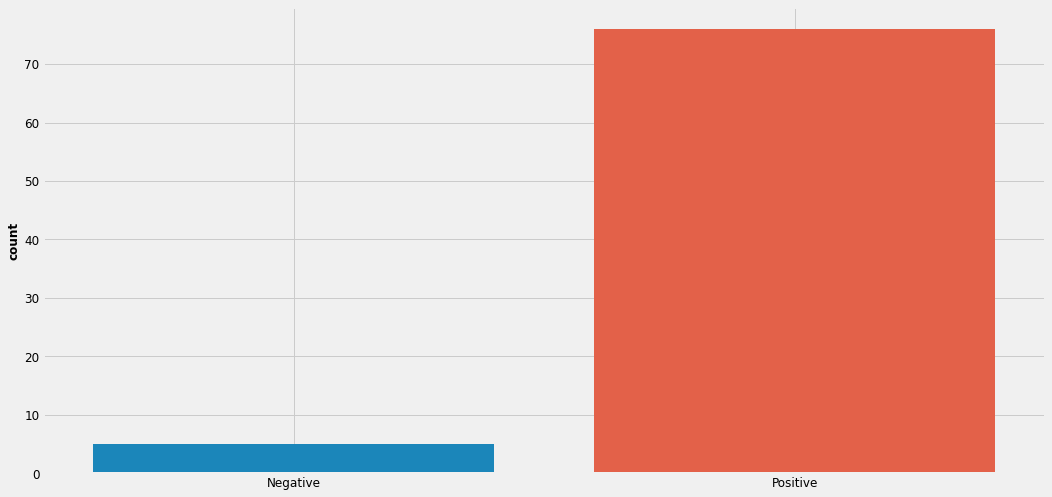

In [594]:
sns.countplot(np.sign(FIT))
plt.xticks([0,1],['Negative','Positive'])
plt.grid(True)

In [554]:
real_value=[]
for c in iswei_city:
    d_city=df[df['City']==c]
    max_value=[]
    for d in range(len(DEC)-1):
        max_value.append(d_city[d_city.year==DEC[d]+1].AverageTemperature.max())
    real_value.append(max_value)
    

In [555]:
DIFF=[]
for v in range(len(real_value)):
    #diff_value=[]
    for q in range(len(real_value[v])):
        difference=np.abs(real_value[v][q]-TOT_MAX[v][q])
        V=[real_value[v][q],TOT_MAX[v][q]]
        DIFF.append(difference/max(V))
    #DIFF.append(diff_value)

Text(0.5, 1.0, 'City: Mogadishu')

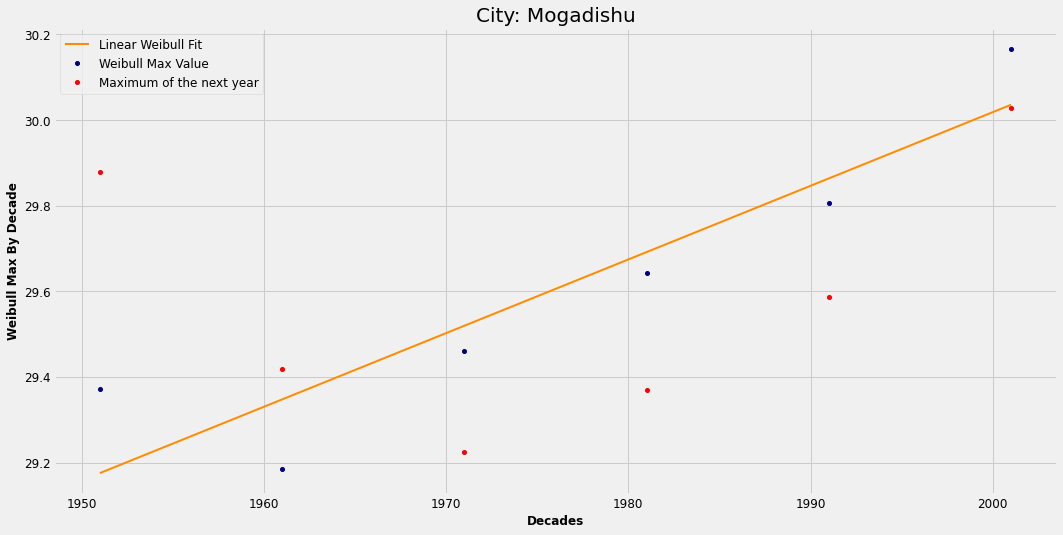

In [557]:
decades=np.array(DEC[:-1]).reshape(-1,1)
rand_city_i=random.choice(np.arange(0,len(iswei_city)))
rand_city=iswei_city[rand_city_i]
rand_val=np.array(TOT_MAX[rand_city_i]).reshape(-1,1)
real_val=real_value[rand_city_i]
fit=LinearRegression().fit(decades,rand_val)
plt.plot(decades,fit.predict(decades),color='darkorange',label='Linear Weibull Fit')
plt.plot(decades,rand_val,'.',color='navy',label='Weibull Max Value')
plt.plot(decades,real_val,'.',color='red',label='Maximum of the next year')
plt.xlabel('Decades')
plt.ylabel('Weibull Max By Decade')
plt.grid(True)
plt.legend()
plt.title('City: '+ str(rand_city),fontsize=20)

In [558]:
TOT_MAX=np.array(TOT_MAX).reshape(1,-1)

In [559]:
TOT_MAX=TOT_MAX[0]

In [560]:
iswei_city_data=np.repeat(iswei_city,6)

In [561]:
decades_data=decades.reshape(1,-1)

In [562]:
decades_data=np.tile(decades_data,len(iswei_city))

In [563]:
real_value=np.array(real_value).reshape(1,-1)

In [564]:
real_value=real_value[0]

In [565]:
decades_data=decades_data[0]

In [582]:
final_df=pd.DataFrame({'Most Probable Value':TOT_MAX,'Real Max of the next year':real_value})

In [583]:
final_df['Difference']=TOT_MAX-real_value

In [584]:
final_df['Percentage Difference(%)']=np.array(DIFF)*100

In [585]:
final_df['City']=iswei_city_data

In [586]:
final_df['Decade']=decades_data

In [595]:
final_df.head()

,Most Probable Value,Real Max of the next year,Difference,Percentage Difference(%),City,Decade
0,20.082524,20.144,-0.061476,0.305184,Addis Abeba,1951
1,19.809678,19.454,0.355678,1.795475,Addis Abeba,1961
2,20.145513,18.818,1.327513,6.589620,Addis Abeba,1971
3,20.157594,19.162,0.995594,4.939052,Addis Abeba,1981
4,20.521286,20.047,0.474286,2.311189,Addis Abeba,1991


In [590]:
final_df['Percentage Difference(%)'].describe()

count    486.000000
mean       2.696416
std        2.509654
min        0.002385
25%        0.949531
50%        2.016708
75%        3.564666
max       17.426372
Name: Percentage Difference(%), dtype: float64